In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import numpy as np

In [2]:
df = pd.read_csv('Warehouse_and_Retail_Sales.csv')

In [3]:
df.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0


In [4]:
# We need to see sales behaviour. So we will remove the unneccessary columns

df = df.drop(['SUPPLIER', 'RETAIL TRANSFERS'], axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   ITEM CODE         307645 non-null  object 
 3   ITEM DESCRIPTION  307645 non-null  object 
 4   ITEM TYPE         307644 non-null  object 
 5   RETAIL SALES      307642 non-null  float64
 6   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 16.4+ MB


In [6]:
df.isnull().sum()

YEAR                0
MONTH               0
ITEM CODE           0
ITEM DESCRIPTION    0
ITEM TYPE           1
RETAIL SALES        3
WAREHOUSE SALES     0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df['ITEM TYPE'].unique()

array(['WINE', 'BEER', 'LIQUOR', 'STR_SUPPLIES', 'KEGS', 'REF', 'DUNNAGE',
       'NON-ALCOHOL'], dtype=object)

In [9]:
# How many unique priduct IDs we have

df['ITEM CODE'].unique().shape

(34053,)

In [ ]:
# Seasonality of each item type by retail sales

month_retail_sales = df.groupby(['ITEM TYPE', 'MONTH'])['RETAIL SALES'].sum().reset_index()
year_retail_sales = df.groupby(['ITEM TYPE', 'YEAR'])['RETAIL SALES'].sum().reset_index()

plt.figure(figsize=(12,10))

plt.subplot(2,1,1)
sns.lineplot(data=month_retail_sales, x='MONTH', y='RETAIL SALES', hue='ITEM TYPE')
plt.title('Monthly Retail Sales by Item Type')

plt.subplot(2,1,2)
sns.lineplot(data=year_retail_sales, x='YEAR', y='RETAIL SALES', hue='ITEM TYPE')
plt.title('Yearly Retail Sales by Item Type')
plt.show()

In [ ]:
# Seasonality of each item type by warehouse sales

month_ware_sales = df.groupby(['ITEM TYPE', 'MONTH'])['WAREHOUSE SALES'].sum().reset_index()
year_ware_sales = df.groupby(['ITEM TYPE', 'YEAR'])['WAREHOUSE SALES'].sum().reset_index()

plt.figure(figsize=(12,10))

plt.subplot(2,1,1)
sns.lineplot(data=month_ware_sales, x='MONTH', y='WAREHOUSE SALES', hue='ITEM TYPE')
plt.title('Monthly Retail Sales by Item Type')

plt.subplot(2,1,2)
sns.lineplot(data=year_ware_sales, x='YEAR', y='WAREHOUSE SALES', hue='ITEM TYPE')
plt.title('Yearly Retail Sales by Item Type')
plt.show()

In [ ]:
# Checking if any item code has multiple item type different item type

temp = df[['ITEM CODE', 'ITEM TYPE']].copy()

temp = temp.groupby('ITEM CODE')['ITEM TYPE'].apply(set).reset_index()

l = []
for i, j in temp.iterrows():
    if len(j['ITEM TYPE']) > 1:
        l.append(j['ITEM CODE'])
    else:
        continue
print(l)

In [12]:
# We are going to make groups of Item code, month and year.
# keep the unique item type and description. and add the total retail/ware sales for each group

df_sort = (
    df.groupby(['MONTH', 'YEAR', 'ITEM CODE'])
    .agg({
        'ITEM TYPE' : set,
        'ITEM DESCRIPTION' : set,
        'RETAIL SALES' : 'sum',
        'WAREHOUSE SALES' : 'sum'
    })
    .reset_index()
)

In [14]:
df_sort['ITEM TYPE'] = df_sort['ITEM TYPE'].apply(lambda x: next(iter(x)))
df_sort['ITEM DESCRIPTION'] = df_sort['ITEM DESCRIPTION'].apply(lambda x: next(iter(x)))

In [13]:
df_sort.head()

,MONTH,YEAR,ITEM CODE,ITEM TYPE,ITEM DESCRIPTION,RETAIL SALES,WAREHOUSE SALES
0,1,2018,100009,{WINE},{BOOTLEG RED - 750ML},0.00,1.0
1,1,2018,100012,{WINE},{PAPI P/GRIG - 750ML},0.00,1.0
2,1,2018,100080,{WINE},{KEDEM CREAM RED CONCORD - 750ML},0.00,1.0
3,1,2018,1001,{BEER},{SAM SMITH ORGANIC PEAR CIDER - 18.7OZ},0.00,1.0
4,1,2018,100200,{WINE},{GAMLA CAB - 750ML},0.08,0.0


In [15]:
scl = StandardScaler()
le = LabelEncoder()

In [16]:
X = df_sort.drop(['ITEM CODE', 'ITEM TYPE', 'ITEM DESCRIPTION'], axis=1)

In [18]:
X_scaled = scl.fit_transform(X)

In [19]:
X_scaled

array([[-1.56675879, -0.40488774, -0.22668434, -0.09721158],
       [-1.56675879, -0.40488774, -0.22668434, -0.09721158],
       [-1.56675879, -0.40488774, -0.22668434, -0.09721158],
       ...,
       [ 1.61076362, -1.32820467, -0.22668434, -0.06920239],
       [ 1.61076362, -1.32820467, -0.22668434, -6.67937051],
       [ 1.61076362, -1.32820467, -0.22668434, -0.72541763]],
      shape=(307641, 4))

In [20]:
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print(X_pca.shape)

(307641, 4)


##

## Clustering

In [21]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import *
import hdbscan

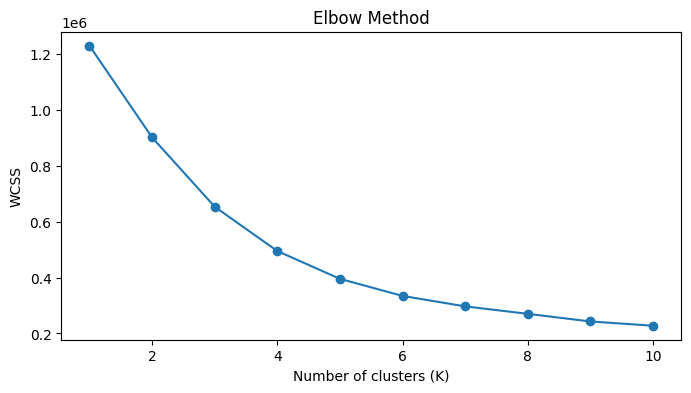

In [22]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [23]:
kmeans = KMeans(
    n_clusters=5,
    max_iter=300,
    random_state=42,
    n_init=10
)

k_clusters = kmeans.fit_predict(X_pca)

In [24]:
df_sort['Clusters'] = k_clusters

In [25]:
df_sort['Clusters'].value_counts()

Clusters
0    111778
2     97114
1     95173
4      3345
3       231
Name: count, dtype: int64

In [26]:
score = silhouette_score(
    X_pca,
    k_clusters,
    sample_size=10_000,
    random_state=42
)
score

0.5158154724874645

In [27]:
df_sort.head()

,MONTH,YEAR,ITEM CODE,ITEM TYPE,ITEM DESCRIPTION,RETAIL SALES,WAREHOUSE SALES,Clusters
0,1,2018,100009,WINE,BOOTLEG RED - 750ML,0.00,1.0,0
1,1,2018,100012,WINE,PAPI P/GRIG - 750ML,0.00,1.0,0
2,1,2018,100080,WINE,KEDEM CREAM RED CONCORD - 750ML,0.00,1.0,0
3,1,2018,1001,BEER,SAM SMITH ORGANIC PEAR CIDER - 18.7OZ,0.00,1.0,0
4,1,2018,100200,WINE,GAMLA CAB - 750ML,0.08,0.0,0


In [28]:
# average sale of each cluster

cluster_profile = (
    df_sort
    .groupby('Clusters')
    [['RETAIL SALES', 'WAREHOUSE SALES']]
    .mean()
)

cluster_profile

,RETAIL SALES,WAREHOUSE SALES
Clusters,,
0,4.661036,12.738554
1,4.857477,11.777958
2,4.853896,14.240850
3,572.893810,6494.733506
4,171.562834,703.632963


In [29]:
# Average cluster sale compared with overall sale

overall = df_sort[['RETAIL SALES', 'WAREHOUSE SALES']].mean()

relative = cluster_profile / overall
relative

,RETAIL SALES,WAREHOUSE SALES
Clusters,,
0,0.663578,0.503601
1,0.691545,0.465625
2,0.691035,0.562992
3,81.561236,256.760363
4,24.424905,27.817162


In [30]:
# Percentage of each item type in every cluster

df_sort.groupby('Clusters')['ITEM TYPE'].value_counts(normalize=True).rename('share')

Clusters  ITEM TYPE   
0         WINE            0.612035
          LIQUOR          0.211473
          BEER            0.134570
          KEGS            0.033459
          NON-ALCOHOL     0.006289
          STR_SUPPLIES    0.001405
          REF             0.000447
          DUNNAGE         0.000322
1         WINE            0.621878
          LIQUOR          0.214115
          BEER            0.123323
          KEGS            0.033896
          NON-ALCOHOL     0.005128
          STR_SUPPLIES    0.000914
          REF             0.000452
          DUNNAGE         0.000294
2         WINE            0.612322
          LIQUOR          0.203966
          BEER            0.141638
          KEGS            0.032745
          NON-ALCOHOL     0.007012
          STR_SUPPLIES    0.001648
          REF             0.000350
          DUNNAGE         0.000319
3         BEER            0.952381
          LIQUOR          0.038961
          NON-ALCOHOL     0.008658
4         BEER            0.4959

In [31]:
# Average monthly sale inside each cluster

df_sort.groupby(['Clusters', 'MONTH'])[['RETAIL SALES', 'WAREHOUSE SALES']].mean()

RETAIL SALES  WAREHOUSE SALES
Clusters MONTH                               
0        1          4.384464        12.573717
         2          4.521163        11.558088
         3          5.329683        13.342557
         4          4.425674        13.100223
         5          4.728083        14.060401
1        6          4.666356        12.619552
         7          4.779063        11.764392
         8          4.394649        13.095040
         9          4.731099        11.421862
         10         4.676912        11.358759
         11         4.827634        11.995310
         12         5.860985        10.266238
2        6          4.797029        13.620942
         7          5.030792        15.713968
         8          4.710486        13.683642
         9          4.684675        14.269019
         10         4.606613        14.206536
         11         5.289986        12.642669
3        1        430.612778      6656.097778
         2        571.941818      5965.656364
         3        626.588889      5774.690000
         4        655.641429      6066.268571
         5        536.184615      7119.608462
         6        681.769545      6946.917727
         7        594.671190      6505.821190
         8        533.949600      6754.040400
         9        546.664483      6424.996552
         10       527.368889      6608.566111
         11       572.113529      6540.643529
         12       641.990000      5862.775455
4        1        166.394970       698.852104
         2        168.468889       698.903956
         3        178.984563       608.939709
         4        162.373171       741.965691
         5        161.599123       653.624035
         6        167.897613       766.352161
         7        169.166362       728.120572
         8        163.702062       753.801031
         9        164.410455       790.244419
         10       176.723516       772.682695
         11       179.595452       650.005284
         12       204.124950       478.862100

In [33]:
# Based on above observation we will give following names to the clusters

cluster_names = {
    0: "Low Volume – Stable Retail",
    1: "Low Volume – Warehouse Lean",
    2: "Low Volume – Mixed Channel",
    3: "Bulk / Institutional High Volume",
    4: "High Performing Core Products"
}

In [34]:
df_sort['Clusters'] = df_sort['Clusters'].map(cluster_names)

In [35]:
df_sort.to_pickle('Clustered_data.pkl')